In [1]:
DATA_DIR = '/lustre/groups/ml01/workspace/louis.kuemmerle/projects/A1/data2/' # "./../"
DATA_VERSION = 'oct22'
RESULTS_DIR = '/lustre/groups/ml01/workspace/louis.kuemmerle/projects/A1/results/'
SHAM = True

########################################################################################
sham_str = '_wSham' if SHAM else ''

# Pro- and anti-inflammatory scores


In [2]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scanpy as sc
import anndata as ann
from scipy.sparse import issparse

from scipy.sparse import csr_matrix
from matplotlib import rcParams
from matplotlib import colors

import datetime

#plt.rcParams['figure.dpi'] = 300

sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 8.3.2
appnope             0.1.3
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
executing           1.2.0
h5py                3.7.0
hypergeom_ufunc     NA
igraph              0.9.11
ipykernel           6.17.1
ipython_genutils    0.2.0
ipywidgets          8.0.6
jedi                0.18.1
joblib              1.2.0
jupyter_server      1.23.2
kiwisolver          1.4.4
leidenalg           0.8.10
llvmlite            0.36.0
matplotlib          3.5.3
mpl_toolkits        NA
natsort             8.2.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba               0.53.1
numpy               1.20.3
packaging           21.3
pandas              1.5.1
parso  

In [3]:
adata = sc.read(DATA_DIR+f'cellxgene_{DATA_VERSION}{sham_str}_umaps.h5ad')

#### Define genes that regulate pro- and anti-inflammatory responses
Main resources:
- https://www.sinobiological.com/resource/cytokines/all-anti-inflammatory-cytokines
- https://www.thermofisher.com/de/de/home/life-science/cell-analysis/cell-analysis-learning-center/immunology-at-work/proinflammatory-cytokines-overview.html 

In [4]:
strong_pro = ['Il6', 'Il1a', 'Il1b', 'Tnf']
also_pro = ['Ifng','Il11','Il17d','Il17f','Il18']

pro = strong_pro + also_pro
anti = ['Il1rn','Tgfb1','Il4','Il10','Il12a','Il13']

In [5]:
[v for v in adata.var_names if v[:4] == "Il17"]

['Il17f', 'Il17re', 'Il17rc', 'Il17ra', 'Il17rd', 'Il17rb', 'Il17d']

In [6]:
for genes in [strong_pro,also_pro,anti]:
    for g in genes:
        print(f"{g:>6}", g in adata.var_names)

   Il6 True
  Il1a True
  Il1b True
   Tnf True
  Ifng True
  Il11 True
 Il17d True
 Il17f True
  Il18 True
 Il1rn True
 Tgfb1 True
   Il4 True
  Il10 True
 Il12a True
  Il13 True


# Inflammation score plots

In [7]:
adata.obs["region"].cat.categories

Index(['Brain', 'Femur', 'Humerus', 'Meninges', 'Pelvis', 'Scapula', 'Skull',
       'Vertebra'],
      dtype='object')

In [21]:
ct_key = "level1"
bones = ["Meninges","Skull","Vertebra","Scapula","Humerus","Pelvis","Femur"]

#a = adata[:,pro+anti].copy()
a = adata[adata.obs["region"].isin(bones),pro+anti].copy()
sc.pp.scale(a)

a.obs["score pro"] = a[:,pro].X.mean(axis=1).copy()
a.obs["score anti"] = a[:,anti].X.mean(axis=1).copy()
    
df = a.obs[["condition",ct_key,"region","score pro","score anti"]].copy()
df["score pro"] = df["score pro"] - df[f"score pro"].min()
df["score anti"] = df["score anti"] - df[f"score anti"].min()

In [24]:
# Rename skull to calvaria and MCAO to MCAo
df["region"] = df["region"].astype(str)
df.loc[df["region"]=="Skull","region"] = "Calvaria"
df["condition"] = df["condition"].astype(str)
df.loc[df["condition"]=="MCAO","condition"] = "MCAo"

In [12]:
from matplotlib import rcParams
from matplotlib import colors

plt.rcParams['figure.dpi'] = 150
SMALL_SIZE = 17
MEDIUM_SIZE = 19
BIGGER_SIZE = 21
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This b

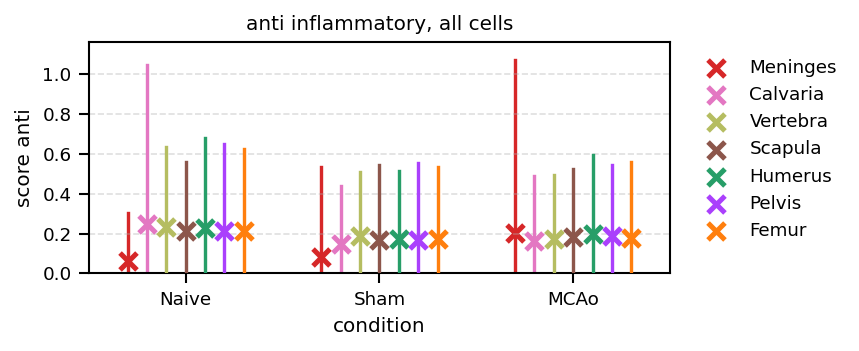

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This b

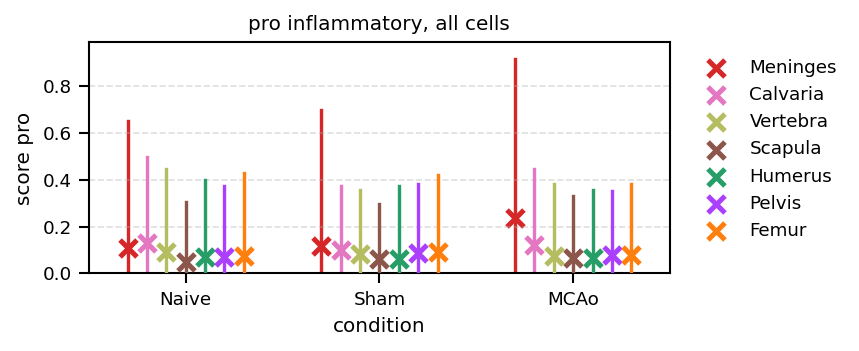

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

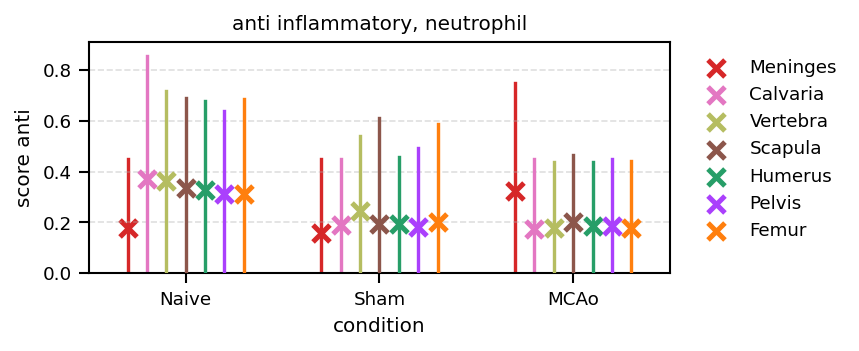

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

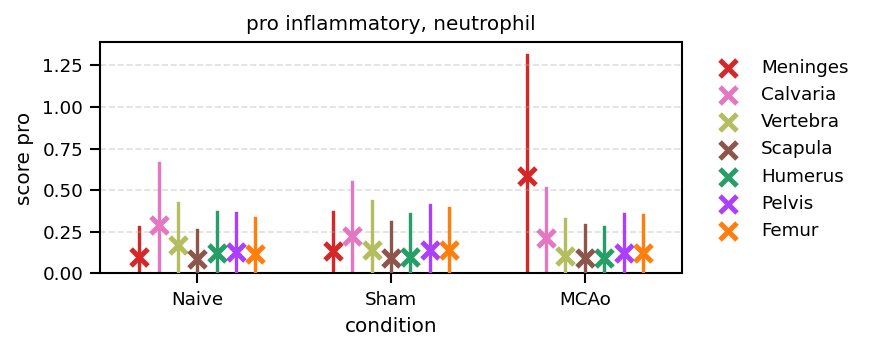

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

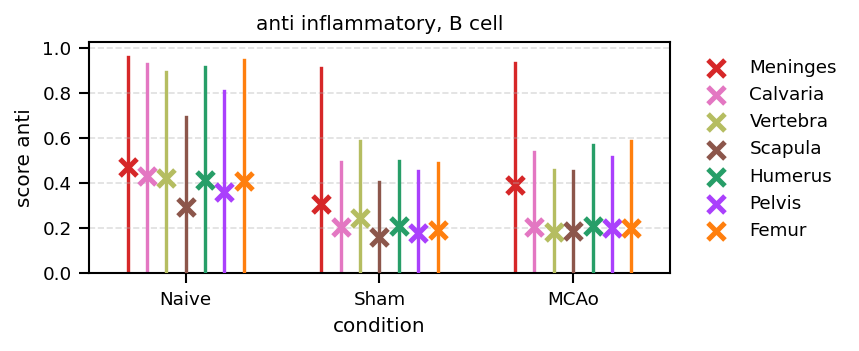

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

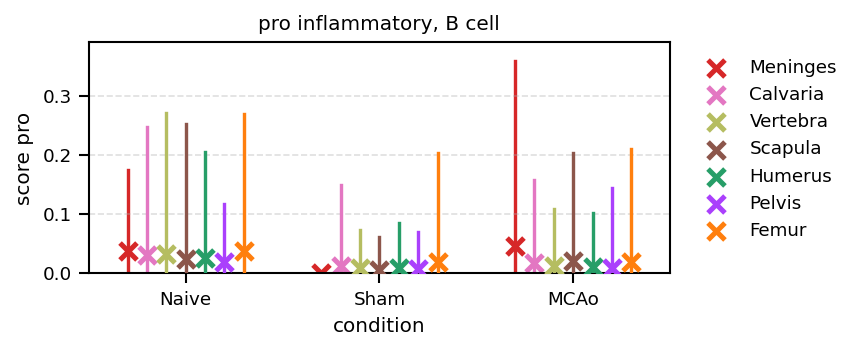

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

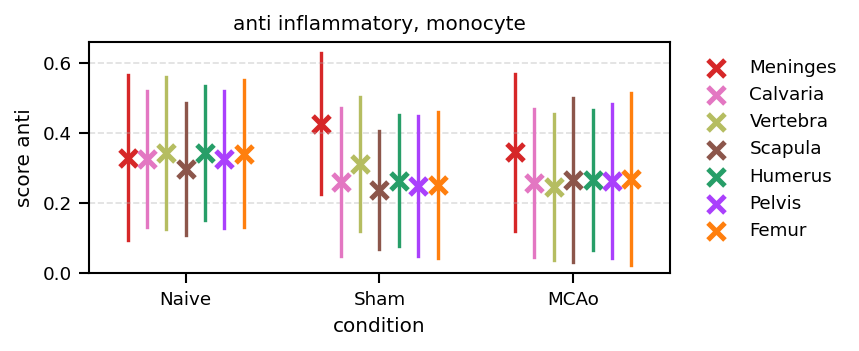

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

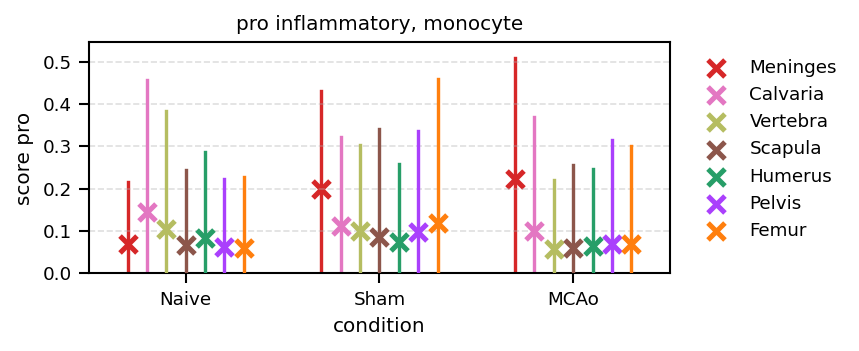

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

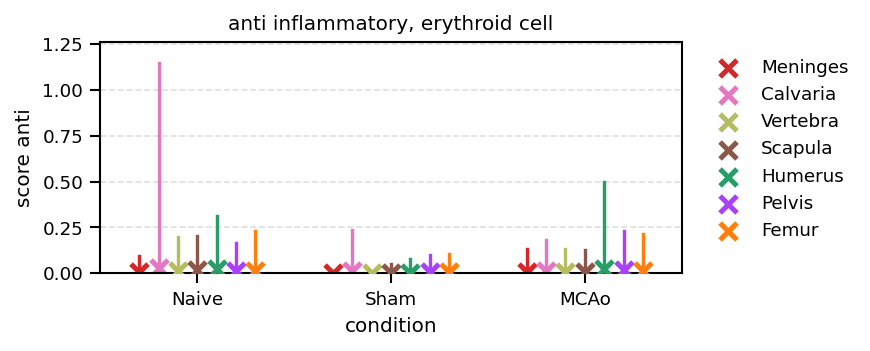

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

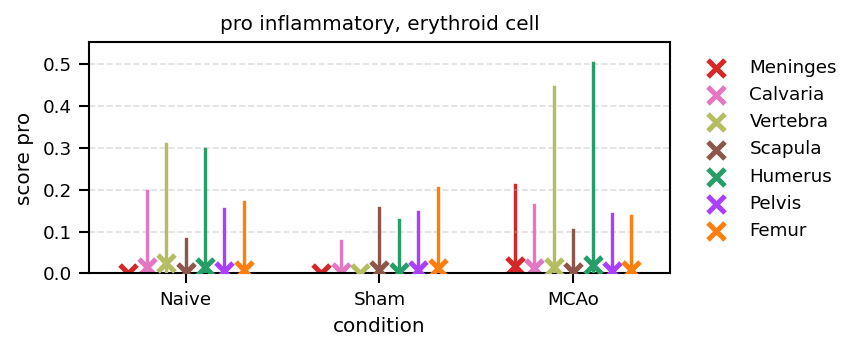

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

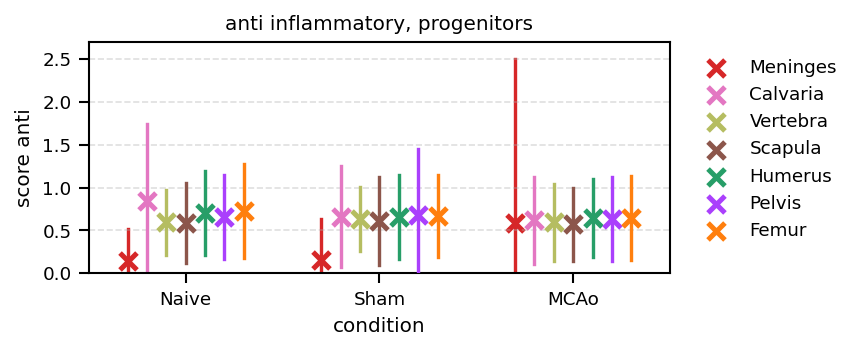

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

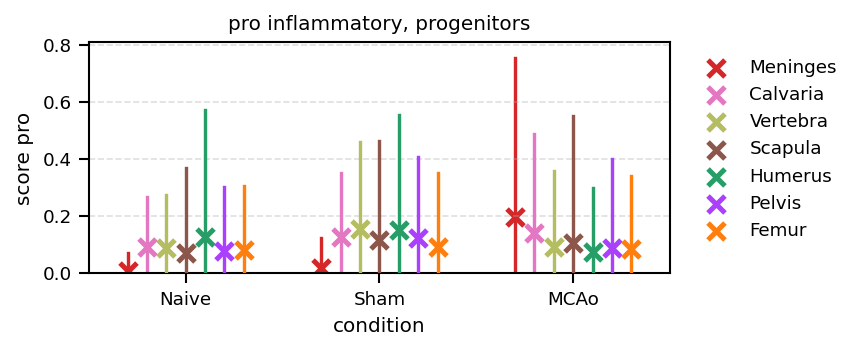

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

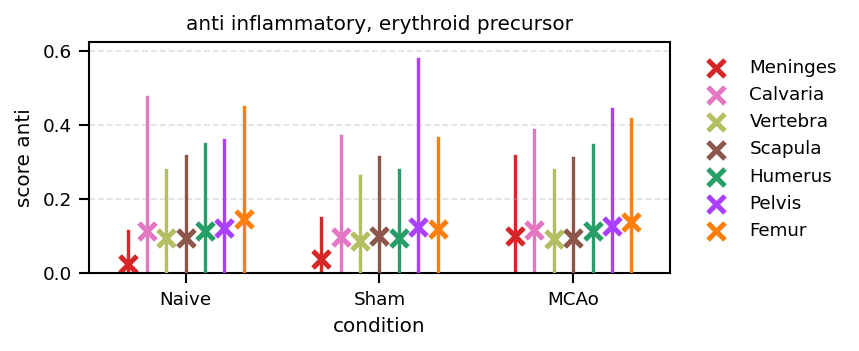

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

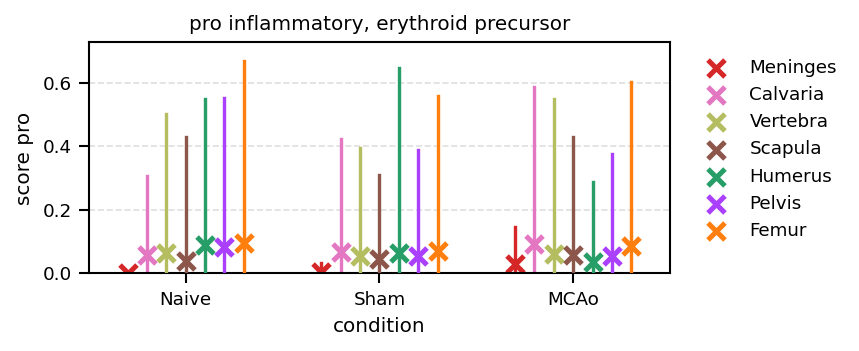

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

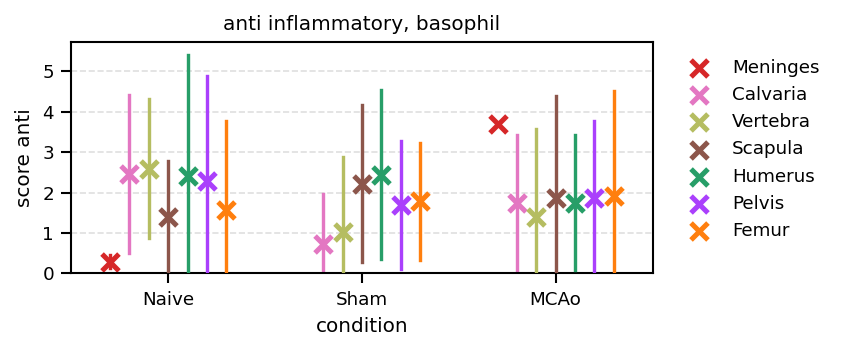

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

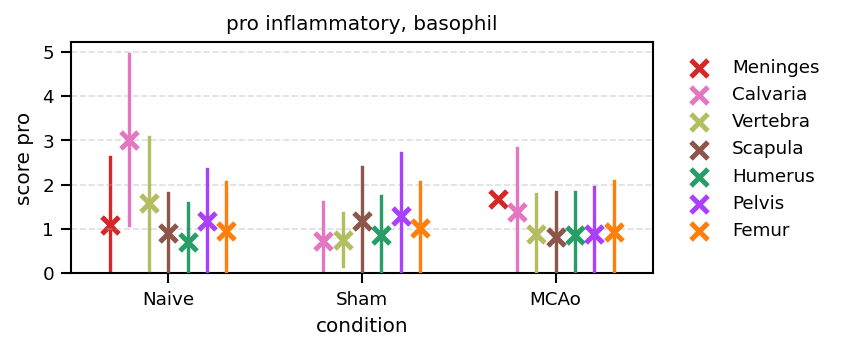

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

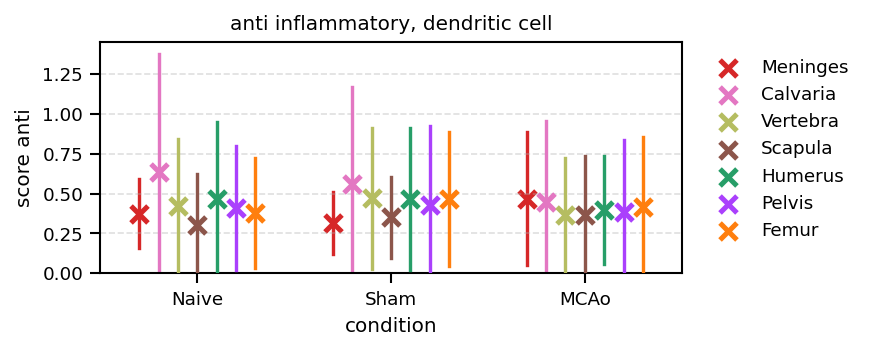

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

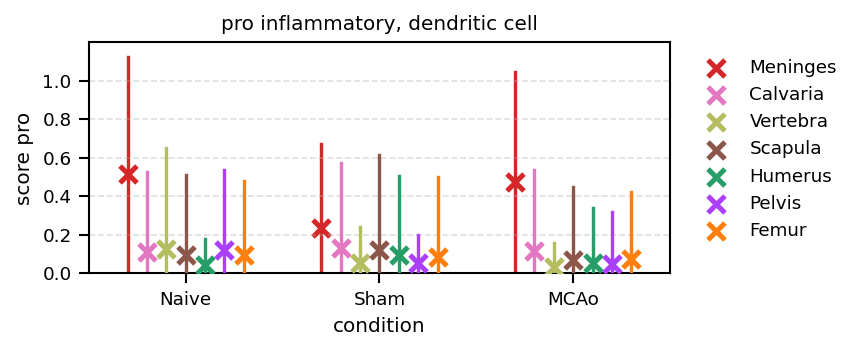

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

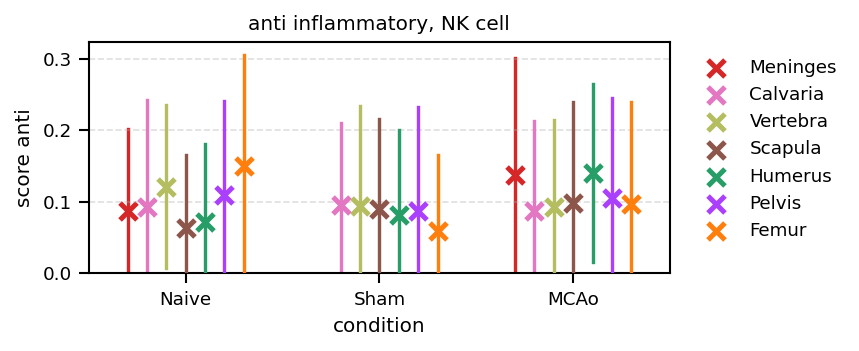

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

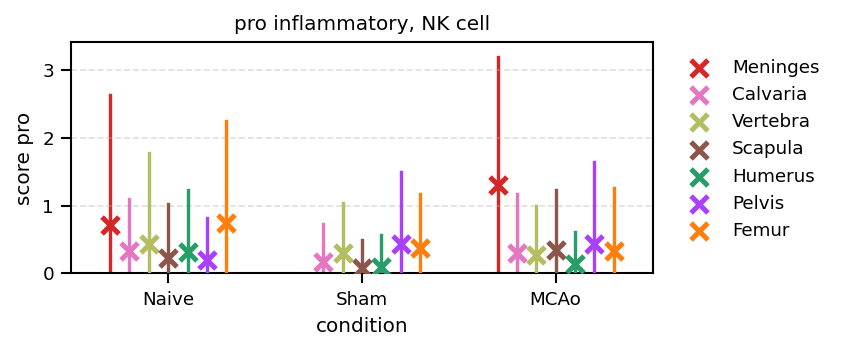

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

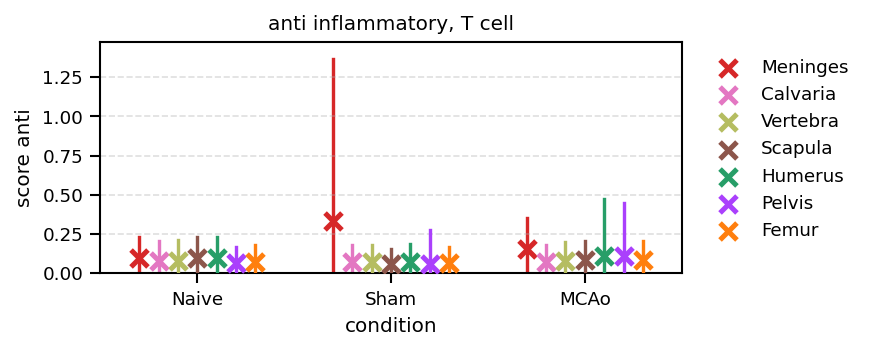

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

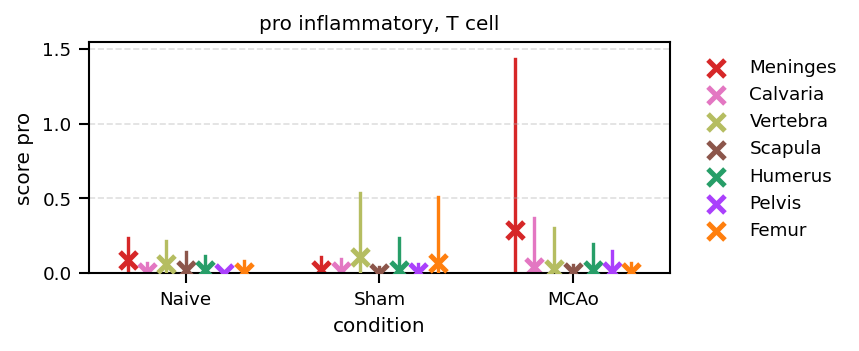

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

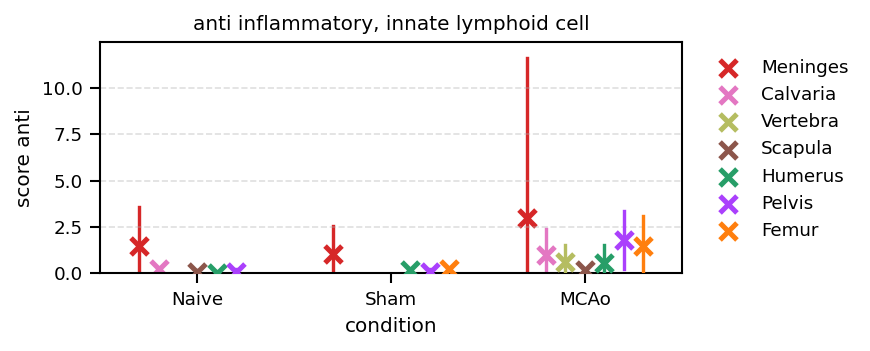

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

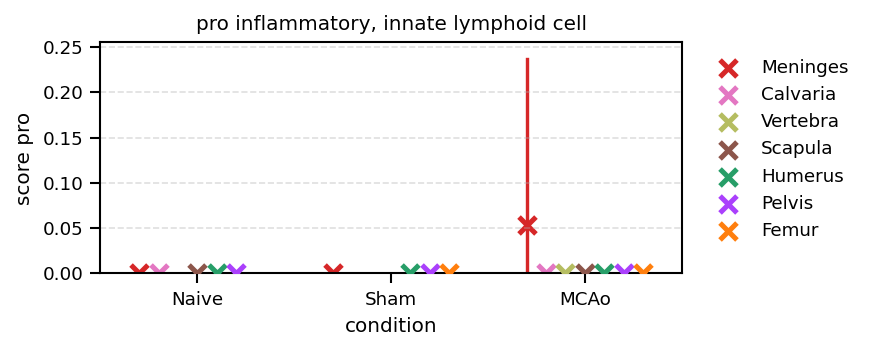

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

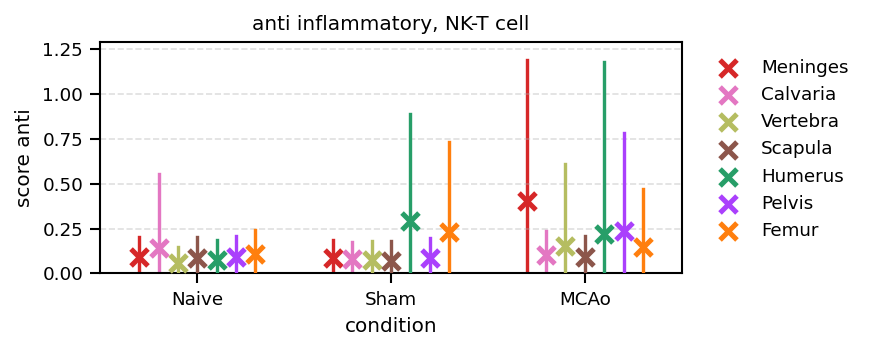

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

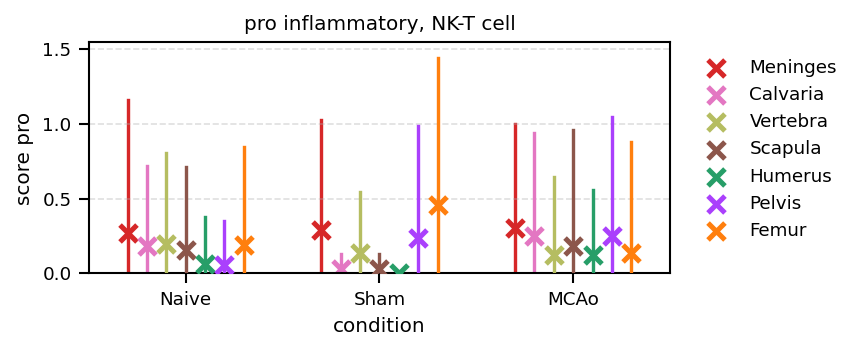

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

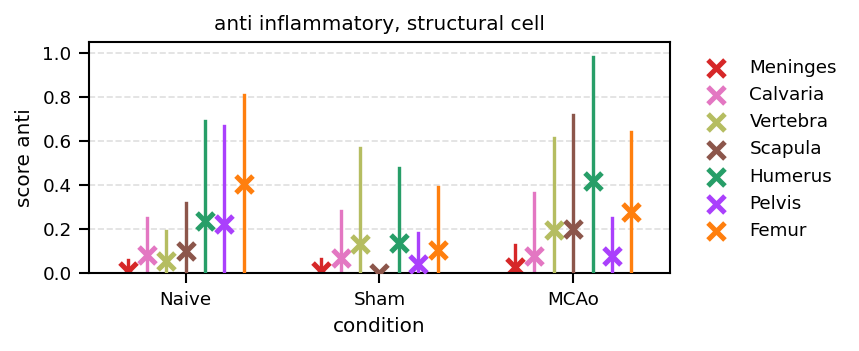

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

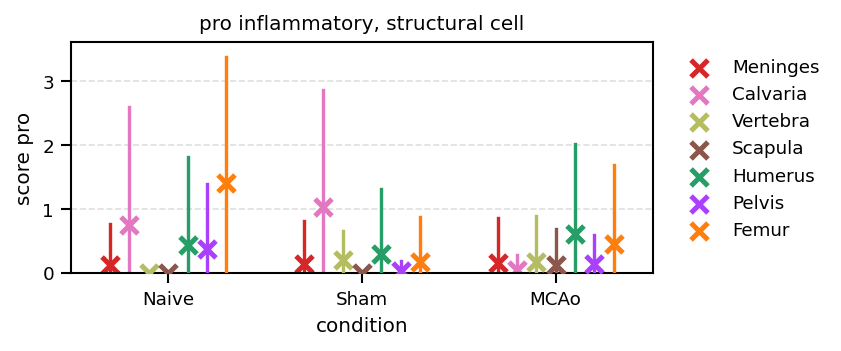

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

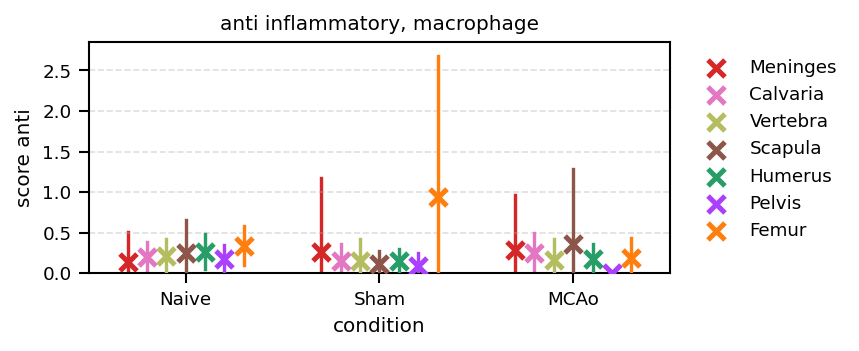

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

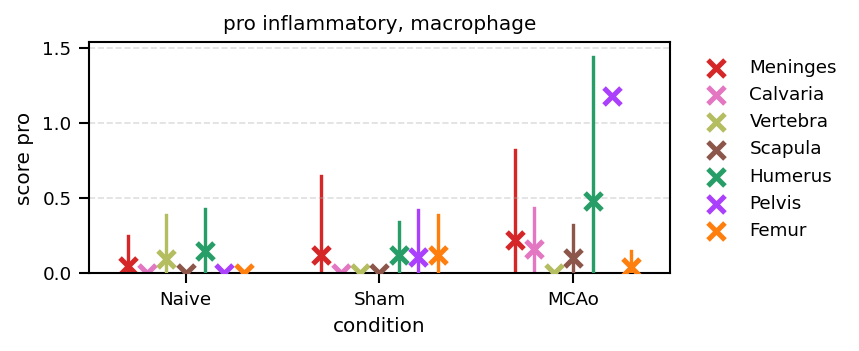

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

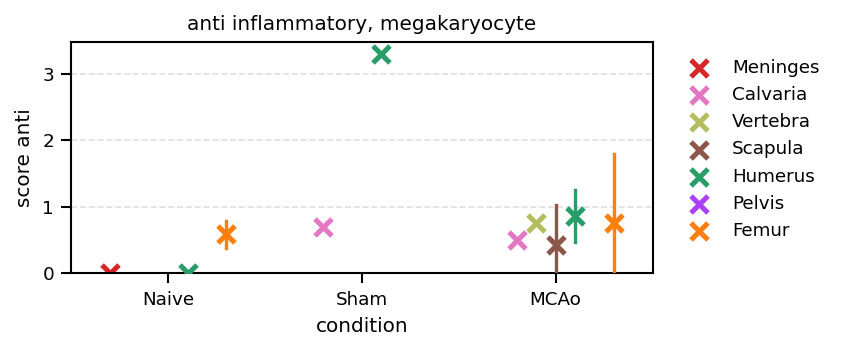

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

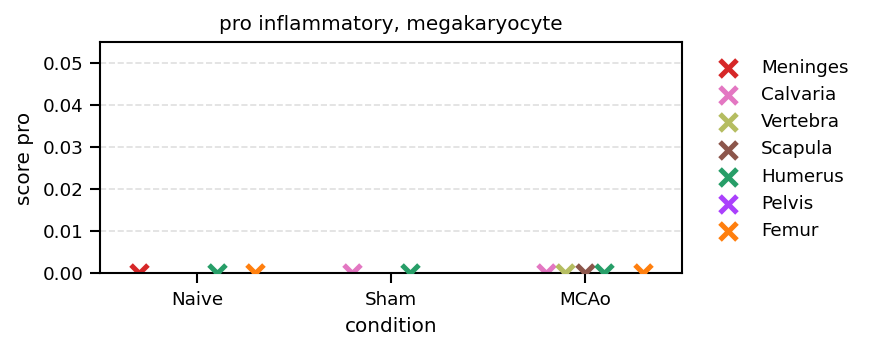

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

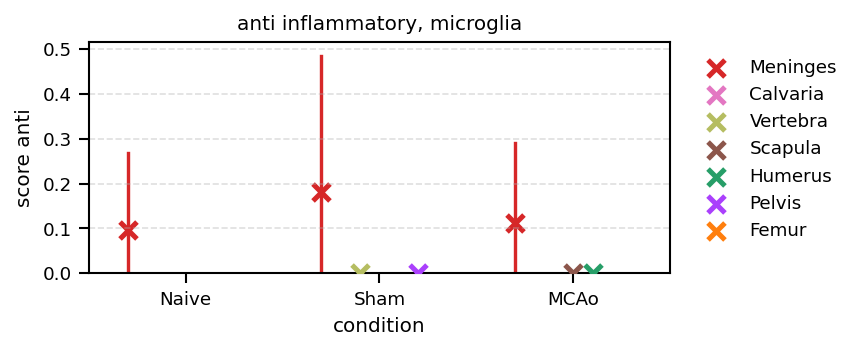

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

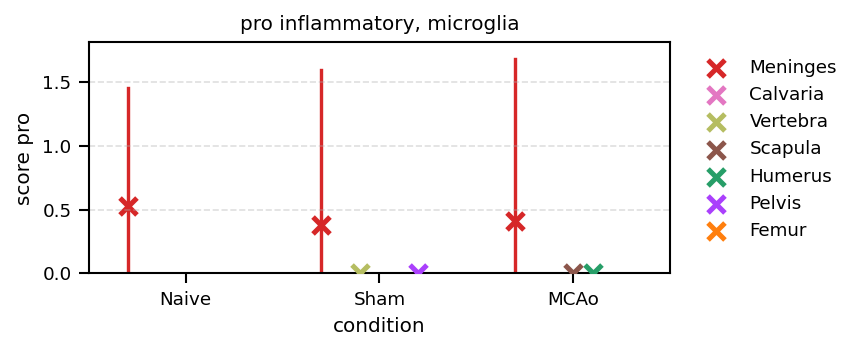

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

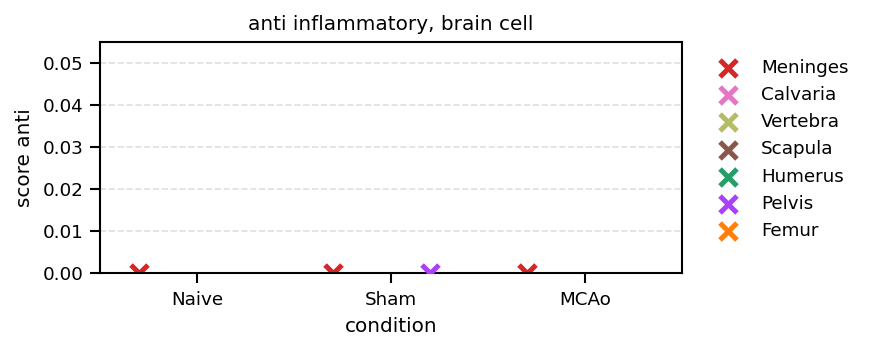

/var/folders/_y/7znw3r4d1zd6f4qzlxgnf461brzyqh/T/ipykernel_29811/369014516.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)],
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8392156862745098, 0.15294117647058825, 0.1568627450980392)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8901960784313725, 0.4666666666666667, 0.7607843137254902)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor o

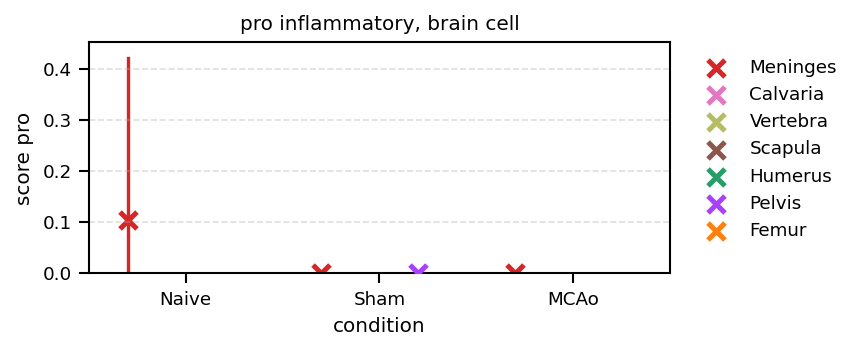

In [25]:
paper_rc = {'lines.linewidth': 0.9, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

colors = {region:color for color,region in zip(a.uns["region_colors"],a.obs["region"].cat.categories) if region in bones}

colors = {("Calvaria" if r=="Skull" else r):color for r,color in colors.items()}
bones = ["Calvaria" if b=="Skull" else b for b in bones]


# full score (all cells)
for infl in ["anti","pro"]:
    fig = plt.figure(figsize=(5,2))
    ax = plt.gca()
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df, 
          ci="sd", markers='x', linestyles="", dodge=0.6, join=True, scale=2, palette=colors, ax=ax)
    plt.title(f"{infl} inflammatory, all cells")
    plt.ylim([0,None])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',frameon=False)
    fig.savefig(f"../figures/inflammation_score/wMeninges_{infl}_inflammatory.png",bbox_inches = "tight", transparent=True)
    plt.show()  

# Per cell type
for ct in df[ct_key].unique():
    for infl in ["anti","pro"]:
        fig = plt.figure(figsize=(5,2))
        ax = plt.gca()
        ax.grid(axis='y', linestyle='--', alpha=0.4)
        sns.pointplot(x="condition",y=f"score {infl}",hue="region",order=["Naive","Sham","MCAo"],hue_order=bones,data=df.loc[(df[ct_key] == ct)], 
              ci="sd", markers='x', linestyles="", dodge=0.6, join=True, scale=2, palette=colors, ax=ax)
        plt.title(f"{infl} inflammatory, {ct}")
        plt.ylim([0,None])        
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',frameon=False)
        if ct in ["neutrophil","B cell","monocyte"]:
            fig.savefig(f"../figures/inflammation_score/wMeninges_{infl}_inflammatory_{ct}.png",bbox_inches = "tight", transparent=True)
        plt.show()

## DE tests for scores and genes

In [26]:
from anndata import AnnData

In [27]:
bones = ["Meninges","Skull","Vertebra","Scapula","Humerus","Pelvis","Femur"]#,"Scapula"
a = adata[adata.obs["region"].isin(bones),pro+anti].copy()
sc.pp.scale(a)

a_DE = AnnData(
    X = np.concatenate([a[:,pro].X,a[:,anti].X,#.toarray().toarray(),
                        a[:,pro].X.mean(axis=1)[:,np.newaxis],
                        a[:,anti].X.mean(axis=1)[:,np.newaxis]],axis=-1),
    var=pd.DataFrame(index=pro+anti+["pro inflammatory","anti inflammatory"],
                     data={"inflammatory":["pro" for _ in pro]+["anti" for _ in anti]+["pro","anti"]}),
    obs=a.obs
)
a_DE.var_names = [f"{v} (anti)" if (v in anti) else f"{v} (pro)" if (v in pro) else v for v in a_DE.var_names]

# Set minimum to zero (then LFchange is calculated correctly)
a_DE.X = a_DE.X - np.min(a_DE.X,axis=0)[np.newaxis,:] #+ 10**(-6)

In [28]:
cts_oi = ["all cells","neutrophil","B cell","monocyte"]

pro_col = [f"{v} (pro)" for v in pro]
anti_col = [f"{v} (anti)" for v in anti]

dfs = []
dfs_LF = []

a_DE.obs["condition2"] = a_DE.obs["condition"].astype(str)
a_DE.obs.loc[a_DE.obs["condition2"].isin(["MCAO","Sham"]),"condition2"] = "injury"
a_DE.obs["region2"] = a_DE.obs["region"].astype(str)
a_DE.obs.loc[a_DE.obs["region2"] != "Meninges","region2"] = "not Meninges"


# Naive vs Injury
df = pd.DataFrame(index=cts_oi,columns=["test"]+pro_col+anti_col+["pro inflammatory","anti inflammatory"])
df_LF = pd.DataFrame(index=cts_oi,columns=["test"]+pro_col+anti_col+["pro inflammatory","anti inflammatory"])

for ct in cts_oi:
    if ct != "all cells":
        a_tmp = a_DE[a_DE.obs["level1"] == ct].copy()
    else:
        a_tmp = a_DE.copy()
    # Run between conditions    
    sc.tl.rank_genes_groups(a_tmp, groupby="condition2")
    
    df.loc[ct,a_tmp.uns["rank_genes_groups"]["names"]["Naive"]] = a_tmp.uns["rank_genes_groups"]["pvals_adj"]["Naive"]
    df_LF.loc[ct,a_tmp.uns["rank_genes_groups"]["names"]["Naive"]] = a_tmp.uns["rank_genes_groups"]["logfoldchanges"]["Naive"]
    print(a_tmp.uns["rank_genes_groups"]["logfoldchanges"])
    df.loc[ct,"test"] = "Naive vs injury"
    df_LF.loc[ct,"test"] = "Naive vs injury"    
    
dfs.append(df)
dfs_LF.append(df_LF)


# Naive vs Sham & Naive vs MCAO & Sham vs MCAO
for cs in [["Naive","Sham"],["Naive","MCAO"],["Sham","MCAO"]]:
    df = pd.DataFrame(index=cts_oi,columns=["test"]+pro_col+anti_col+["pro inflammatory","anti inflammatory"])
    df_LF = pd.DataFrame(index=cts_oi,columns=["test"]+pro_col+anti_col+["pro inflammatory","anti inflammatory"])
    for ct in cts_oi:
        if ct != "all cells":
            a_tmp = a_DE[(a_DE.obs["level1"] == ct) & (a_DE.obs["condition"].isin(cs))].copy()
        else:
            a_tmp = a_DE[a_DE.obs["condition"].isin(cs)].copy()
        # Run between conditions    
        sc.tl.rank_genes_groups(a_tmp, groupby="condition")
        
        df.loc[ct,a_tmp.uns["rank_genes_groups"]["names"][cs[0]]] = a_tmp.uns["rank_genes_groups"]["pvals_adj"][cs[0]]
        df_LF.loc[ct,a_tmp.uns["rank_genes_groups"]["names"][cs[0]]] = a_tmp.uns["rank_genes_groups"]["logfoldchanges"][cs[0]]
        print(a_tmp.uns["rank_genes_groups"]["logfoldchanges"])
        df.loc[ct,"test"] = f"{cs[0]} vs {cs[1]}"
        df_LF.loc[ct,"test"] = f"{cs[0]} vs {cs[1]}"
    dfs.append(df)
    dfs_LF.append(df_LF)   

# Run for each condition: Meninges vs rest
for condition in a_DE.obs["condition"].unique():
    
    df = pd.DataFrame(index=cts_oi,columns=["test"]+pro_col+anti_col+["pro inflammatory","anti inflammatory"])
    df_LF = pd.DataFrame(index=cts_oi,columns=["test"]+pro_col+anti_col+["pro inflammatory","anti inflammatory"])    
    
    for ct in cts_oi:    
        if ct != "all cells":
            a_tmp = a_DE[(a_DE.obs["level1"] == ct) & (a_DE.obs["condition"] == condition)].copy()
        else:
            a_tmp = a_DE[a_DE.obs["condition"] == condition].copy()
            
        sc.tl.rank_genes_groups(a_tmp, groupby="region2")

        df.loc[ct,a_tmp.uns["rank_genes_groups"]["names"]["Meninges"]] = a_tmp.uns["rank_genes_groups"]["pvals_adj"]["Meninges"]
        df_LF.loc[ct,a_tmp.uns["rank_genes_groups"]["names"]["Meninges"]] = a_tmp.uns["rank_genes_groups"]["logfoldchanges"]["Meninges"]
        df.loc[ct,"test"] = f"{condition} Meninges vs rest"
        df_LF.loc[ct,"test"] = f"{condition} Meninges vs rest"
        
    dfs.append(df)
    dfs_LF.append(df_LF)   
        
df = pd.concat(dfs)
df_LF = pd.concat(dfs_LF)

df.index.name = "celltype"
df = df.reset_index()
df_LF.index.name = "celltype"
df_LF = df_LF.reset_index()

df["test"] = df["test"].astype("category")
df_LF["test"] = df_LF["test"].astype("category")
test_order = [
    'Naive vs injury', 'Naive vs Sham', 'Naive vs MCAO', 'Sham vs MCAO', 
    'Naive Meninges vs rest', 'Sham Meninges vs rest', 'MCAO Meninges vs rest'
]
df["test"] = df["test"].cat.reorder_categories(test_order)
df_LF["test"] = df_LF["test"].cat.reorder_categories(test_order)

df = df.sort_values(["celltype"])
df_LF = df_LF.sort_values(["celltype"])

[( 0.9825478 ,  0.47477925) ( 0.29359055,  0.5442133 )
 ( 0.61694586,  0.12289667) ( 0.4430607 ,  0.1704635 )
 ( 0.49360156,  0.27426353) ( 0.23110294,  0.5578928 )
 ( 0.31571984,  0.31903276) ( 0.07022894,  0.04831427)
 (-0.00789102,  0.00789102) (-0.04831427, -0.07022894)
 (-0.31903276, -0.31571984) (-0.5578928 , -0.23110294)
 (-0.27426353, -0.49360156) (-0.1704635 , -0.4430607 )
 (-0.12289667, -0.61694586) (-0.5442133 , -0.29359055)
 (-0.47477925, -0.9825478 )]
[(  2.1938705 ,  0.26989788) (  0.9240687 ,  1.4228321 )
 (  1.0407217 , 23.066786  ) (  0.12039772, 21.298317  )
 (  0.14329398,  1.5282946 ) (  1.2499592 ,  1.3010505 )
 (  0.0618136 ,  0.6883248 ) (  1.9549706 ,  0.25041723)
 (  0.5520658 , -0.5520658 ) ( -0.25041723, -1.9549706 )
 ( -0.6883248 , -0.0618136 ) ( -1.3010505 , -1.2499592 )
 ( -1.5282946 , -0.14329398) (-21.298317  , -0.12039772)
 (-23.066786  , -1.0407217 ) ( -1.4228321 , -0.9240687 )
 ( -0.26989788, -2.1938705 )]
[( 1.0789441 ,   0.7365783 ) ( 0.9520582 ,   

In [29]:
df.to_csv("wMeninges_inflammation_scores_significance.csv")
df_LF.to_csv("wMeninges_inflammation_scores_LFchange.csv")

In [30]:
def highlight_significant(x):#, color):
    if not isinstance(x,float):
        if x == "Naive vs injury":
            return f"color: red;"
        elif x in ["MCAO Skull vs rest","Sham Skull vs rest","Naive Skull vs rest"]:
            return f"color: orange;"
        else:
            return None
    return np.where((x < 0.05), f"color: green;", None)

def highlight_sign(x):#, color):
    if not isinstance(x,float):
        if x == "Naive vs injury":
            return f"color: red;"
        elif x in ["MCAO Skull vs rest","Sham Skull vs rest","Naive Skull vs rest"]:
            return f"color: orange;"
        else:
            return None
    if (x == 0.0) or np.isnan(x):
        return f"color: black;"
    return np.where((x > 0.0), f"color: red;", f"color: blue;")

#### P values (green: significant)

In [31]:
df.style.applymap(highlight_significant)

#### Logfoldchanges (red: upregulated, blue: downregulated)

In [32]:
df_LF.style.applymap(highlight_sign)

## Some violin plots to investigate distributions of each gene contributing to the scores

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorator

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


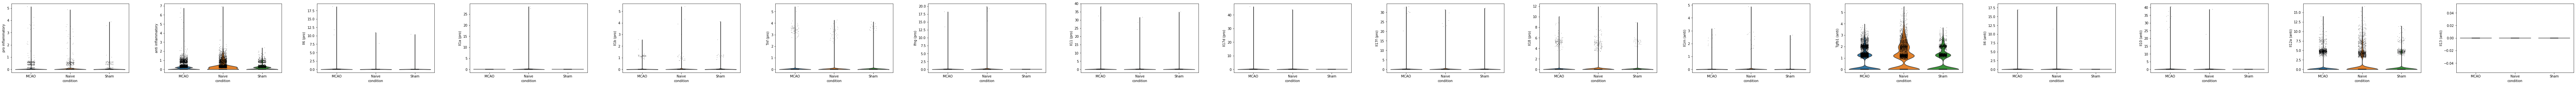

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


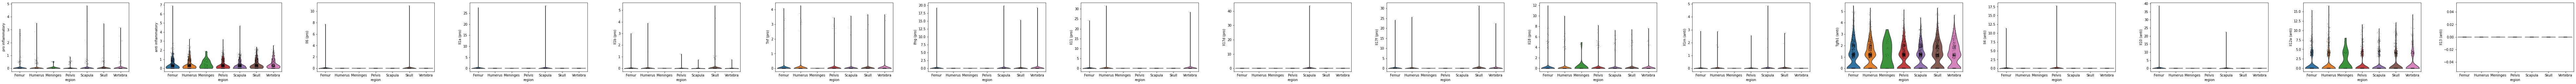

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

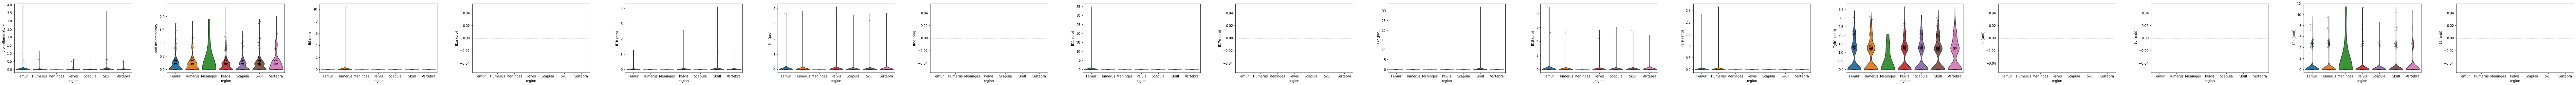

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/

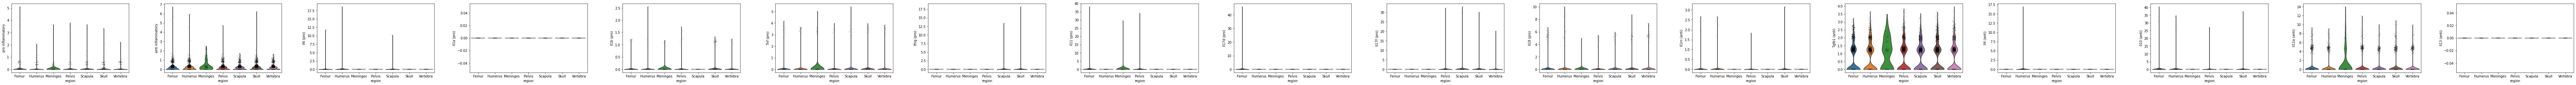

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


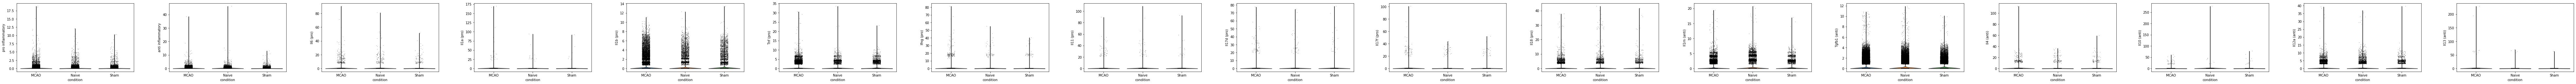

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


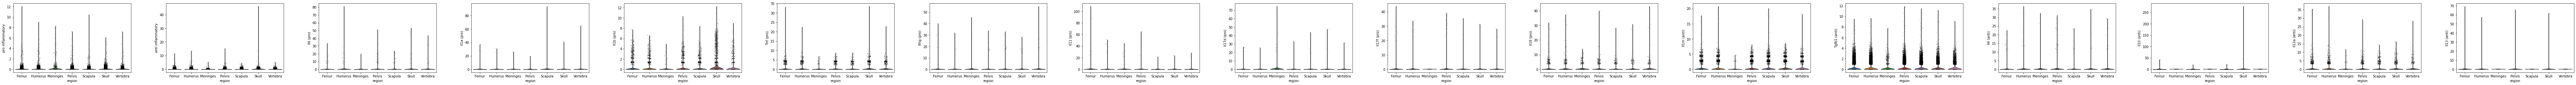

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/

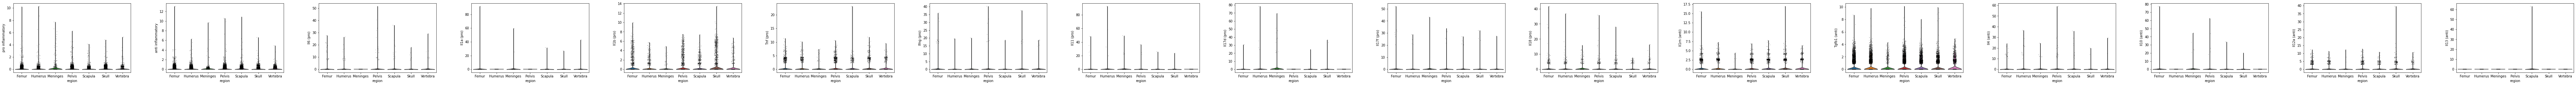

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


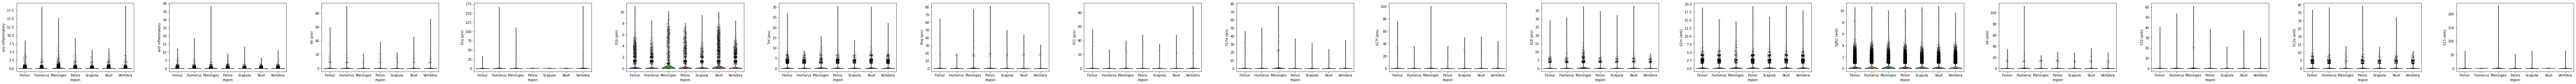

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/

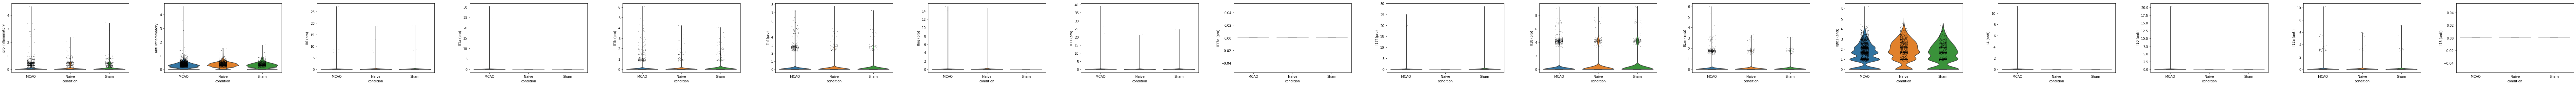

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/

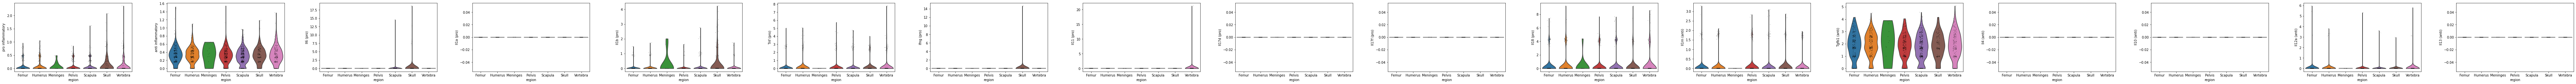

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/

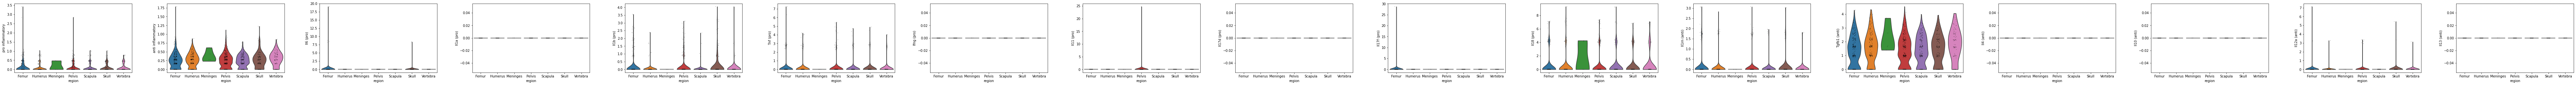

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/

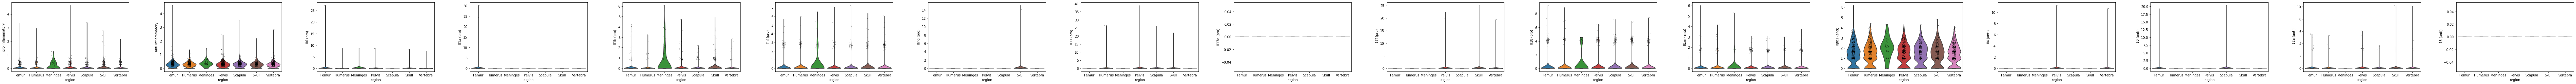

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


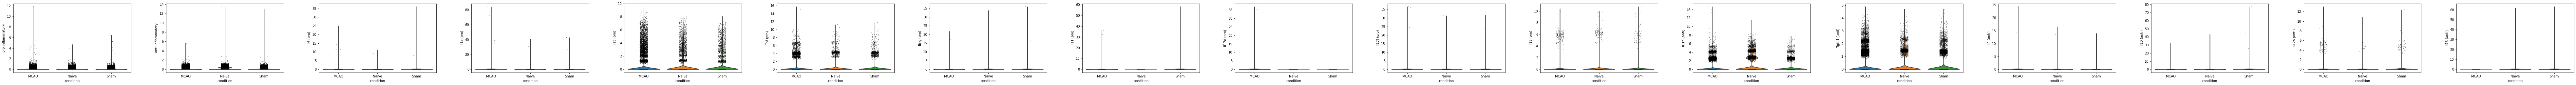

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/

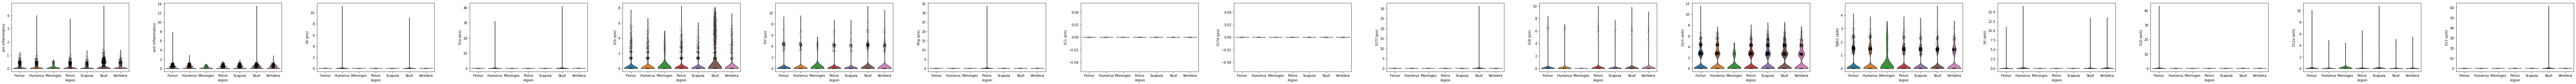

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/

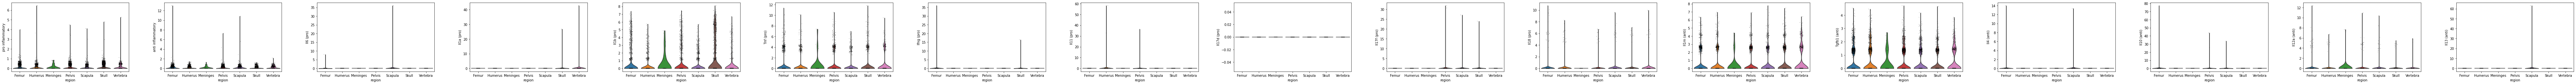

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variab

/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/python/lib/python3.8/site-packages/

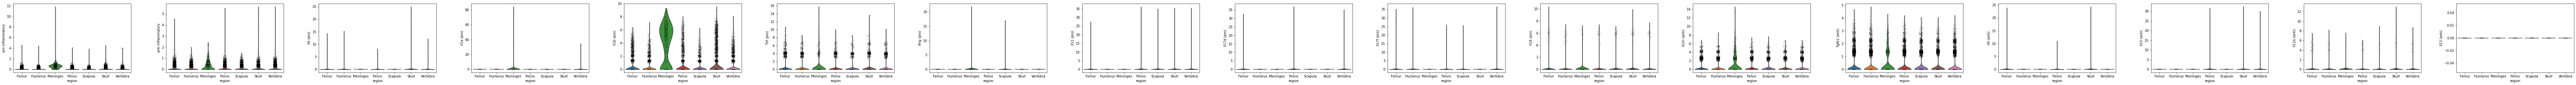

In [69]:
for ct in df["celltype"].unique():
    
    if ct == "all cells":
        a_tmp = a_DE
    else:
        a_tmp = a_DE[(a_DE.obs["level1"]==ct)]
        
    sc.pl.violin(
        a_tmp,
        a_DE.var_names[-2:].tolist() + a_DE.var_names[:-2].tolist(), # all var_names but pooled scores at the beginning
        "condition",
        save=f"_infl_all_conditions_celltype_{ct}.png"
    )            
    
    for cond in ["Naive","Sham","MCAO"]:
    
        if ct == "all cells":
            a_tmp = a_DE[(a_DE.obs["condition"]==cond)]
        else:
            a_tmp = a_DE[(a_DE.obs["level1"]==ct) & (a_DE.obs["condition"]==cond)]
            
        sc.pl.violin(
            a_tmp,
            a_DE.var_names[-2:].tolist() + a_DE.var_names[:-2].tolist(), # all var_names but pooled scores at the beginning
            "region",
            save=f"_infl_cond_{cond}_celltype_{ct}.png"
        )